# SVM (Support Vector Machines)

## Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

Class
2    458
4    241
Name: count, dtype: int64


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


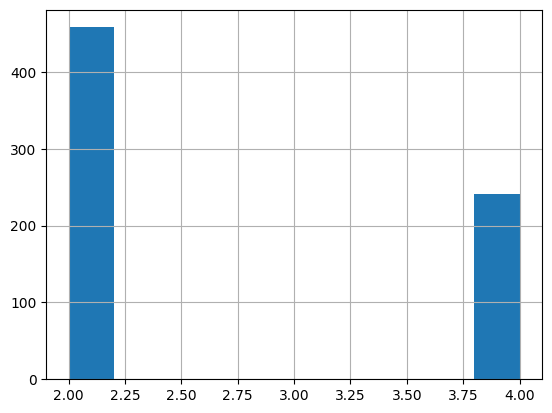

In [43]:
df = pd.read_csv("cell_samples.csv") # Class: 2 (benign) or 4 (malignant)

print(df["Class"].value_counts())
df["Class"].hist()
df.head()

## Plots

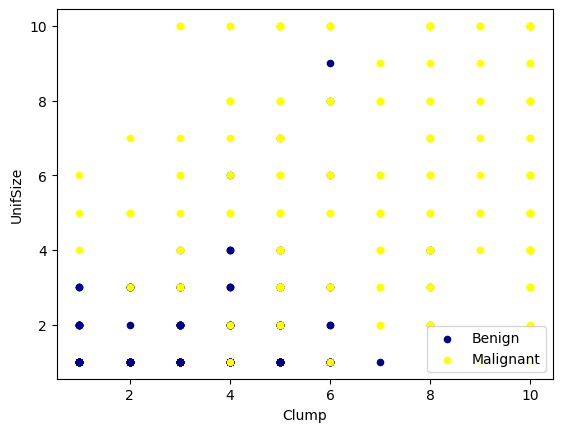

In [44]:
ax = df[df["Class"] == 2].plot(kind="scatter", x="Clump", y="UnifSize", color="darkblue", label="Benign")
df[df["Class"] == 4].plot(kind="scatter", x="Clump", y="UnifSize", color="yellow", label="Malignant", ax=ax)
plt.show()

## Preprocessing Data

In [45]:
print(df.dtypes, "\n------------") ## BareNuc is nonnumeric (it's object)
print(df["BareNuc"].value_counts(), "\n------------")

df = df[pd.to_numeric(df["BareNuc"], errors="coerce").notnull()] # remove nonnumeric records
df["BareNuc"] = df["BareNuc"].astype(int) # convert to integer

print(df.dtypes, "\n------------")
print(df["BareNuc"].value_counts())

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object 
------------
BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64 
------------
ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object 
------------
BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64


## Splitting Data

In [46]:
print(df.columns)

x = df[["Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize","BareNuc", "BlandChrom", "NormNucl", "Mit"]]
y = df["Class"]

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')


## Selecting Train & Test Data

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

print(f"Train Data: x: {x_train.shape}, y: {y_train.shape}")
print(f"Test Data: x: {x_test.shape}, y: {y_test.shape}")

Train Data: x: (546, 9), y: (546,)
Test Data: x: (137, 9), y: (137,)


## SVM Classification

##### Kernels: 1.Linear | 2.Polynomial | 3.Radial basis function (RBF) | 4.Sigmoid

In [48]:
from sklearn import svm

x_train = np.asanyarray(x_train)
y_train = np.asanyarray(y_train)

classifier = svm.SVC(kernel="rbf")
classifier.fit(x_train, y_train)

x_test = np.asanyarray(x_test)
y_test = np.asanyarray(y_test)
predicted_y = classifier.predict(x_test)

## Evaluation

### Jaccard

In [49]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, predicted_y, pos_label=2)

0.9444444444444444

### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

### Computing Confusion Matrix

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


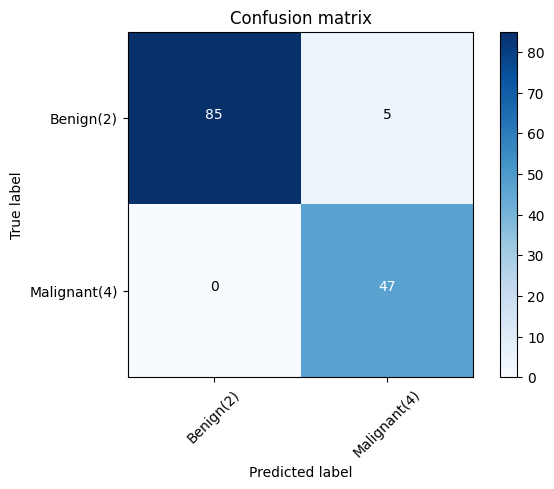

In [51]:
cnf_matrix = confusion_matrix(y_test, predicted_y, labels=[2,4])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

### Classification Report

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

